<a href="https://colab.research.google.com/github/joshuahurd515/ai-and-data-science-work/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MLP training score 0.9319148936170212
SVM training accuracy: 0.9085106382978724


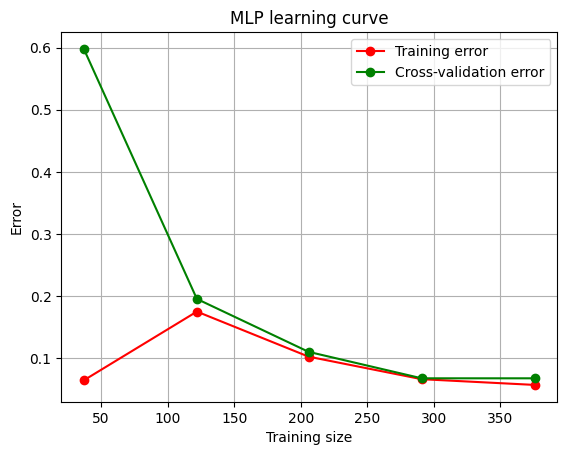

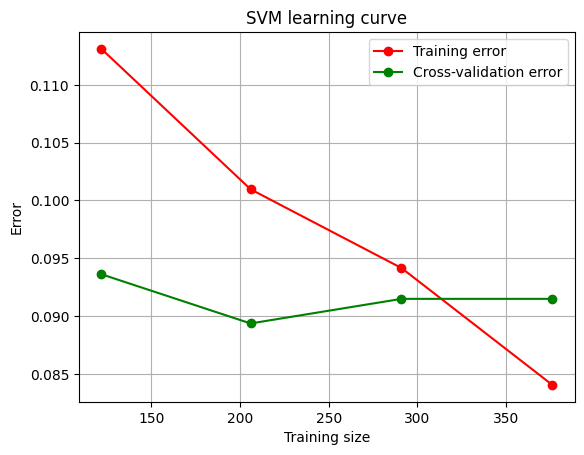

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve, cross_val_score, train_test_split
from sklearn.svm import SVC

# Load dataset
data = pd.read_csv("wdbc.data", header=None)
data.drop(columns=[0], inplace=True)

# Convert diagnosis column to numerical values
data[1] = data[1].map({'M': 1, 'B': 0})

# Split dataset into training and testing sets
X_train = data.iloc[:-99, 1:]
y_train = data.iloc[:-99, 0]
X_test = data.iloc[-99:, 1:]
y_test = data.iloc[-99:, 0]
# Build MLP model
modelMLP = MLPClassifier(random_state=1, max_iter=2000).fit(X_train, y_train)
accTrain = np.mean(cross_val_score(modelMLP, X_train, y_train, cv = 5))
print("MLP training score", accTrain)

model_svm = SVC(kernel='rbf', gamma='scale', class_weight='balanced', random_state=1).fit(X_train, y_train)
acc_train = np.mean(cross_val_score(model_svm, X_train, y_train, cv = 5))
print("SVM training accuracy:", acc_train)

train_sizes, train_scores, test_scores = learning_curve(modelMLP, X_train, y_train, cv=5)

# Plot learning curves for MLP
plt.figure()
plt.title("MLP learning curve")
plt.xlabel("Training size")
plt.ylabel("Error")
plt.grid()
plt.plot(train_sizes, 1-np.mean(train_scores, axis=1), 'o-', color="r", label="Training error")
plt.plot(train_sizes, 1-np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation error")
plt.legend(loc="best")

# Build SVM model
model_svm = SVC(kernel='rbf', gamma='scale', class_weight='balanced', random_state=1)
train_sizes, train_scores, test_scores = learning_curve(model_svm, X_train, y_train, cv=5)

# Plot learning curves for SVM
plt.figure()
plt.title("SVM learning curve")
plt.xlabel("Training size")
plt.ylabel("Error")
plt.grid()
plt.plot(train_sizes, 1-np.mean(train_scores, axis=1), 'o-', color="r", label="Training error")
plt.plot(train_sizes, 1-np.mean(test_scores, axis=1), 'o-', color="g", label="Cross-validation error")
plt.legend(loc="best")

plt.show()

**Description of Model**

In this code, I implemented two classification models, a Multi-Layer Perceptron and a Support Vector Machine, to predict whether a breast cancer tumor is classifies as either malignant or benign on a multitude of features. First, I loaded the dataset and converted the output column into numerical values using the map() function. After this, I then split the data into training and test data, using the first 469 instances as training, and the last 99 as testing data.

To implement the MLP, I used a built in library with the function MLPClassifier(). I kept most of the parameters the same excpet I made the number of iterations 2000 and changed the random state to 1. To tune the MLP model, I used the learning_curve function which is able to return the training and cross validation scores for different training sizes, following this I plotted the learning curve for the model.

For the SVM model, I basically did the same thing. I used a built in library for the SVM model called SVC(), and kept most of the parameters the same from what you gave us from the starter code, and again, I used the learning_curve() function to get the training and cross validation scores, and then went onto plot the model

All in all, the MLP had a higher accuracy than the SVM where the MLP score was 93.19% and the SVM model had an accuracy score of 90.85%, the MLP also had a lower error rate than the SVM as shown in diagrams.

The learning curves were used to help understand the bias-variance tradeoff of each model by showing how the training and cross validation errors are changing with increased training sizes. The learning curves from the above models suggest that the MLP model has a lower bias and variance than the SVM which could be an explanation as to why it performed better than the SVM
